## Cào dữ liệu

#### Thư viện

In [19]:
from bs4 import BeautifulSoup
from bs4.element import Tag
import requests
from google.colab import drive
import os
import cv2
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [20]:
names = ["real male face", "real female face"]
## Thư mục raw lưu ảnh được cào về
# path = "/content/drive/MyDrive/KHDL/raw"
path = "/content/demo"
## Hàm cào ảnh
def crawl(sample_size):
  count=0
  for name in names:
    para = {}
    para["1"] = name.lower().replace(" ", "+")

    path_folder = os.path.join(path,name)
    if not os.path.exists(path_folder):
      os.makedirs(path_folder)

    for i in range(1, 150):
      if count >= sample_size*(names.index(name)+1)/len(names):
          break
      print(i)
      headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"}
      # Gửi yêu cầu đến đường dẫn
      req = requests.get(f"https://www.freepik.com/search?format=search&page={i}&query={para['1']}", headers=headers)
      # Nội dung của trang
      content = req.content  
      soup = BeautifulSoup(content, 'html.parser')
      # Lấy nội dung các thẻ img
      imgs = soup.select(".showcase__link.js-detail-data-link > img")
    
      
      for img in imgs :
        # Với mỗi thẻ, lấy đường dẫn ảnh, yêu cầu dữ liệu ảnh từ internet và lưu trữ.
        if count >= sample_size*(names.index(name)+1)/len(names):
          break
        url_img = img.attrs["data-src"]
        print(count+1, url_img)

        response = requests.get(url_img)

        if response.status_code != 404:
          count +=1
          
          fp = open(os.path.join(path_folder,f'{count}.jpg'), 'wb')
          fp.write(response.content)
          fp.close()


In [21]:
  crawl(10) #Demo Dataset
  #crawl(1000) #Small Dataset
	# crawl(10000) #Big Dataset

1
1 https://img.freepik.com/free-photo/closeup-handsome-man_144627-3697.jpg?size=626&ext=jpg
2 https://img.freepik.com/free-photo/portrait-cheerful-caucasian-man_53876-13440.jpg?size=626&ext=jpg
3 https://img.freepik.com/free-photo/portrait-austrian-man_53876-15108.jpg?size=626&ext=jpg
4 https://img.freepik.com/free-photo/worldface-british-guy-white-background_53876-14467.jpg?size=626&ext=jpg
5 https://img.freepik.com/free-photo/portrait-austrian-man_53876-15107.jpg?size=626&ext=jpg
1
6 https://img.freepik.com/free-photo/front-view-portrait-beauty-young-female-face_186202-460.jpg?size=626&ext=jpg
7 https://img.freepik.com/free-photo/beautiful-blonde-woman-portrait-smiling-face_53876-139732.jpg?size=626&ext=jpg
8 https://img.freepik.com/free-photo/portrait-young-beautiful-woman-with-smoky-eyes-makeup-pretty-young-adult-girl-posing-studio-closeup-attractive-female-face_186202-4439.jpg?size=626&ext=jpg
9 https://img.freepik.com/free-photo/portrait-beautiful-woman-smiling-shot_329181-17464

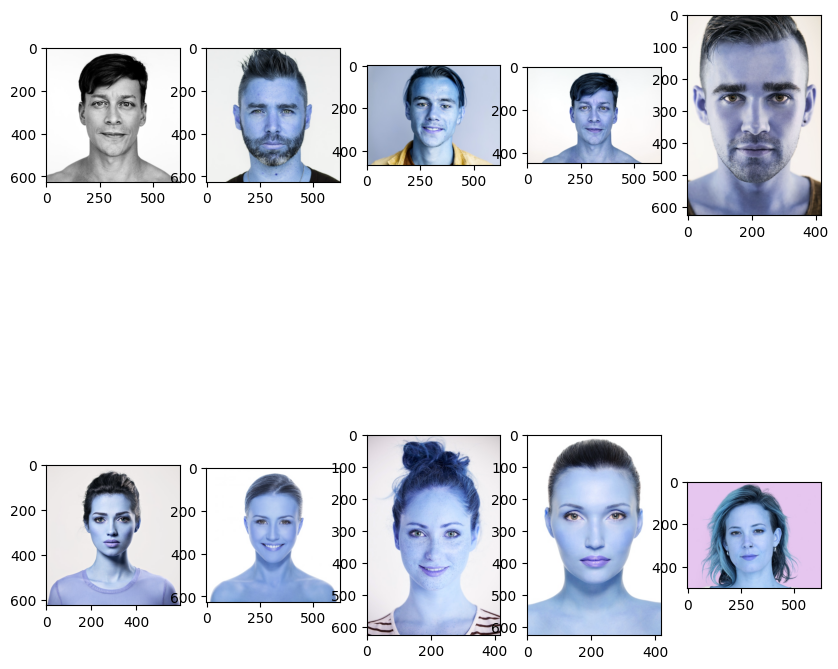

In [ ]:
images = []
labels = []
## Lấy ảnh từ thư mục đã lưu.
for name in names:
  count = 0
  path_folder = os.path.join(path,name)
  image_paths = os.listdir(path_folder)
  for image_path in image_paths:
    count +=1
    if count > 5:
      count = 0
      break
    image = cv2.imread(os.path.join(path_folder,image_path))
    images.append(image)
    label = names.index(name)
    labels.append(label)

## Xem ảnh đã cào.
fig, axss = plt.subplots(2,5, figsize=(10,10))
for idx, axs in enumerate(axss):
    for idy, ax in enumerate(axs):
      ax.imshow(images[idx*5 + idy])
plt.show()

# Trên tập Small Dataset

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
## Lấy ảnh từ thư mục content/drive/MyDrive/KHDL/{folder}.
## Đầu vào là tên thư mục, đầu ra là ảnh và nhãn
def Get_data(folder="raw"):
  images = []
  labels = []
  for name in names:
    path_folder = os.path.join("/content/drive/MyDrive/KHDL/",folder,name)
    image_paths = os.listdir(path_folder)
    for image_path in image_paths:
      image = cv2.imread(os.path.join(path_folder,image_path))
      images.append(image)
      label = names.index(name)
      labels.append(label)
  return np.array(images), np.array(labels)

# Hàm phân biệt mã màu RGB và Light Grey
def checkModeColor(image):
  image = image.reshape(-1,3)
  if (image.std(axis = 1) == 0).all():
    return "Light Grey"
  return "RGB"

In [ ]:
## Lấy ảnh từ thư mục content/drive/MyDrive/KHDL/Raw_SmallDS.
Small_Images, Small_Labels = Get_data("Raw_SmallDS")

<ipython-input-1-fe447cfd0c0e>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images), np.array(labels)


In [ ]:
w = []
h = []
mode = []
for image in Small_Images:
  shape = image.shape
  w.append(shape[1])
  h.append(shape[0])

In [ ]:
numberEachClass = np.unique(Small_Labels, return_counts=True)

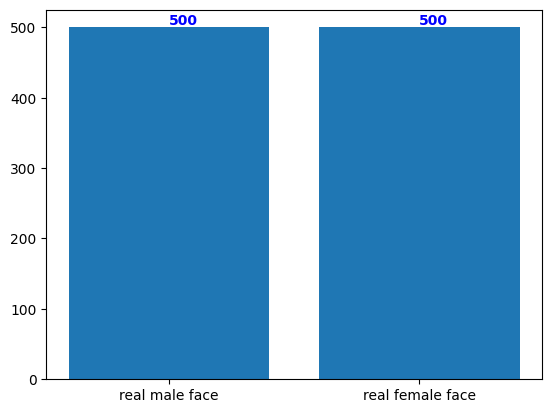

In [ ]:
plt.bar(names, numberEachClass[1])
for i, v in enumerate(numberEachClass[1]):
    plt.text(i, v + 3, str(v), color='blue', fontweight='bold')
plt.show()

Nhận xét: Sự phân bố dữ liệu giữa các lớp rất đồng đều

Chiều rộng: 397 - 626
Chiều dài: 228 - 626
Tỷ lệ: 0.634185303514377 - 2.745614035087719
Kích cỡ ảnh: 142728 - 391876


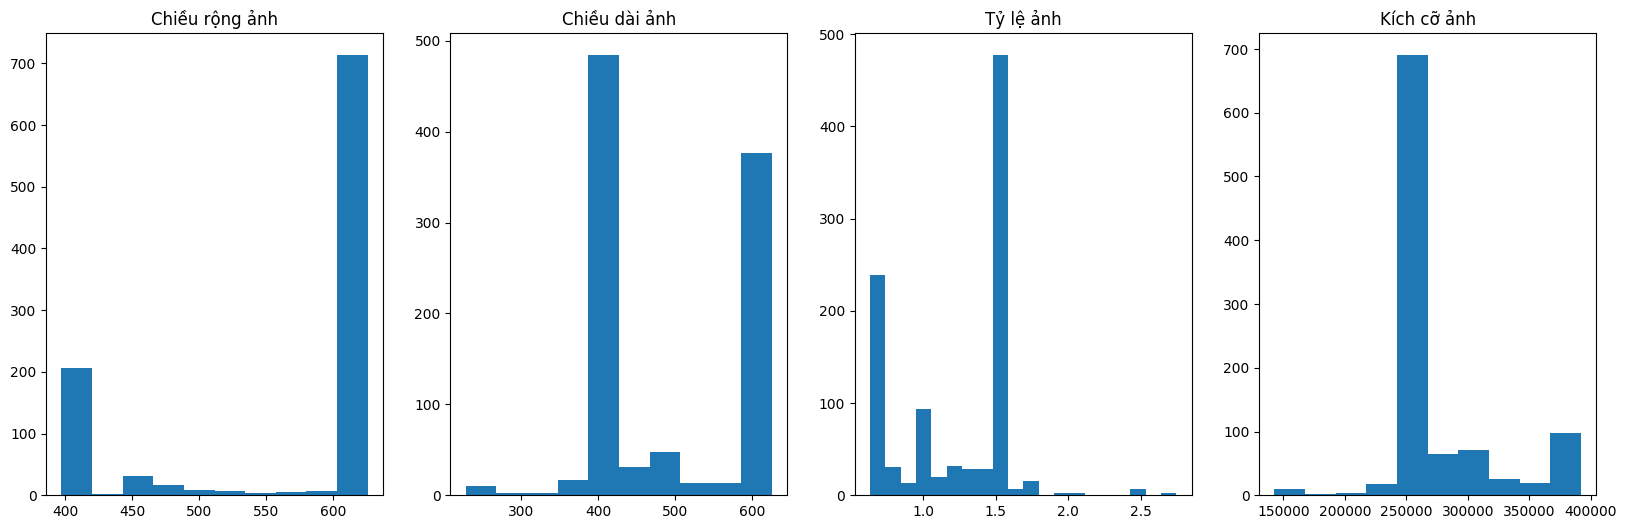

In [ ]:
plt.figure(figsize=(20, 6))
print(f"Chiều rộng: {min(w)} - {max(w)}")
plt.subplot(1,4,1)
plt.title("Chiều rộng ảnh")
plt.hist(w)
print(f"Chiều dài: {min(h)} - {max(h)}")
plt.subplot(1,4,2)
plt.title("Chiều dài ảnh")
plt.hist(h)
print(f"Tỷ lệ: {min(np.divide(w,h))} - {max(np.divide(w,h))}")
plt.subplot(1,4,3)
plt.title("Tỷ lệ ảnh")
plt.hist(np.divide(w,h), bins=20)
print(f"Kích cỡ ảnh: {min(np.multiply(w,h))} - {max(np.multiply(w,h))}")
plt.subplot(1,4,4)
plt.title("Kích cỡ ảnh")
plt.hist(np.multiply(w,h), bins=10)

plt.show() 

Nhận xét: 
<br>- Chiều rộng (tính theo pixel) của ảnh có giá trị thuộc khoảng (397, 626), tập trung chủ yếu ở giá trị khoảng 600 pixel
<br>- Chiều dài (tính theo pixel) của ảnh có giá trị thuộc khoảng (228, 626), tập trung chủ yếu ở giá trị khoảng 400 pixel
<br>- Tỷ lệ (chiều rộng /  chiều dài) của ảnh có giá trị thuộc khoảng (0.6, 2.7), tập trung chủ yếu ở khoảng giá trị 1.5
<br>- Kích thước (tính theo pixel) của ảnh có giá trị thuộc khoảng (142728 , 391876), tập trung chủ yếu ở khoảng giá trị 250000 pixel

In [ ]:
maps = map(checkModeColor, Small_Images)
thelist = list(maps)
Set = set(thelist)
Count = {"RGB" : 0, "Light Grey" : 0}
for mode in Set:
  Count[mode] += thelist.count(mode)

In [ ]:
print(Count.values())

dict_values([993, 7])


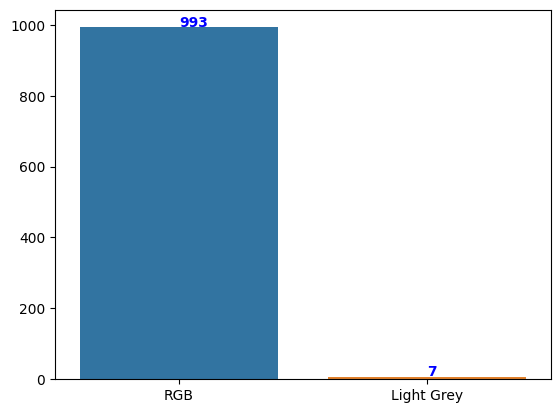

In [ ]:
sns.barplot(x=list(Count.keys()), 
            y=list(Count.values()))
for i, v in enumerate(Count.values()):
    plt.text(i, v + 3, str(v), color='blue', fontweight='bold')
plt.show()

Lượng ảnh hệ màu RGB chiếm hầu như toàn bộ tập dữ liệu.<br>Lượng ảnh hệ màu Light Grey không đáng kể

# Trên tập Big Dataset

## Lấy dữ liệu

In [ ]:
## Lấy ảnh từ thư mục content/drive/MyDrive/KHDL. (Tập BigDS)
Images, Labels = Get_data("")

<ipython-input-6-2ee75fec8425>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images), np.array(labels)


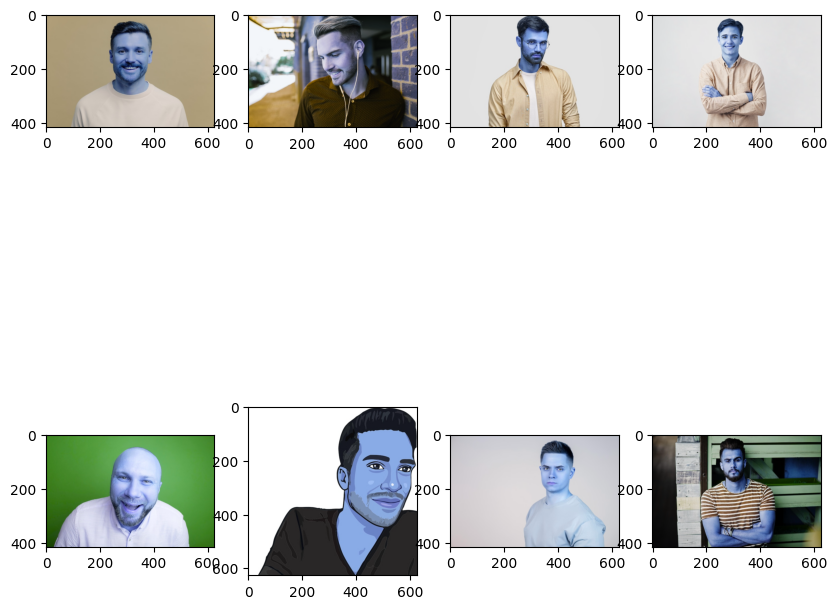

In [ ]:
fig, axss = plt.subplots(2,4, figsize=(10,10))
for idx, axs in enumerate(axss):
    for idy, ax in enumerate(axs):
      ax.imshow(Images[idx*4 + idy])
plt.show()

## Mô tả các thông tin về tập dữ liệu

In [ ]:
w = []
h = []
mode = []
for image in Images:
  shape = image.shape
  w.append(shape[1])
  h.append(shape[0])

In [ ]:
numberEachClass = np.unique(Labels, return_counts=True)

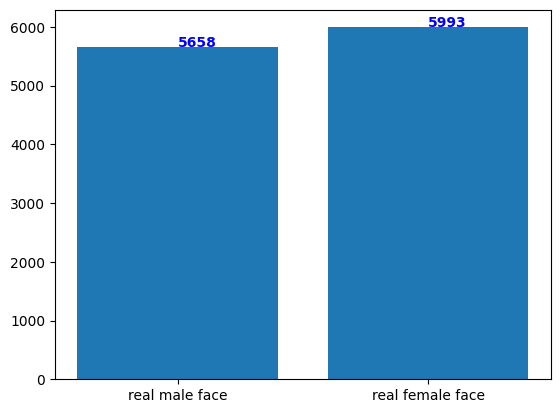

In [ ]:
plt.bar(names, numberEachClass[1])
for i, v in enumerate(numberEachClass[1]):
    plt.text(i, v + 3, str(v), color='blue', fontweight='bold')
plt.show()

Nhận xét: Sự phân bố dữ liệu trên mỗi lớp tương đối đồng đều. Dữ liệu của nữ nhiều hơn không đáng kể.

Chiều rộng: 355 - 626
Chiều dài: 157 - 626
Tỷ lệ: 0.5670926517571885 - 3.9872611464968153
Kích cỡ ảnh: 98282 - 391876


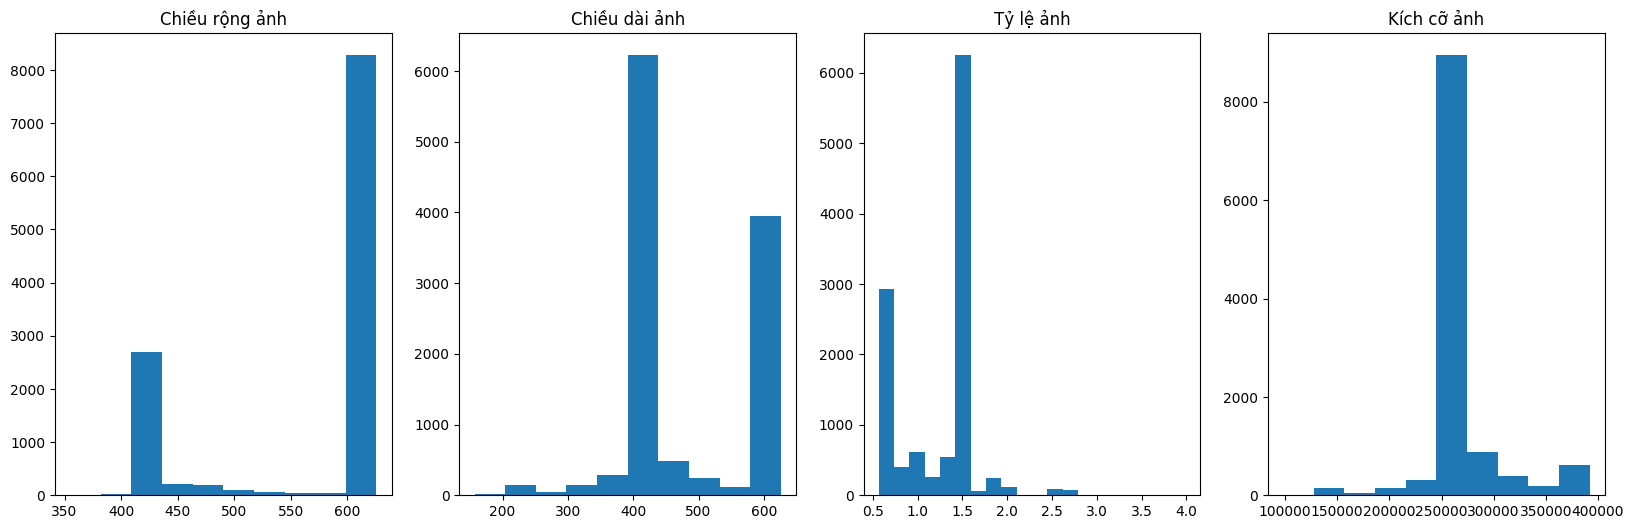

In [ ]:
plt.figure(figsize=(20, 6))
print(f"Chiều rộng: {min(w)} - {max(w)}")
plt.subplot(1,4,1)
plt.title("Chiều rộng ảnh")
plt.hist(w)
print(f"Chiều dài: {min(h)} - {max(h)}")
plt.subplot(1,4,2)
plt.title("Chiều dài ảnh")
plt.hist(h)
print(f"Tỷ lệ: {min(np.divide(w,h))} - {max(np.divide(w,h))}")
plt.subplot(1,4,3)
plt.title("Tỷ lệ ảnh")
plt.hist(np.divide(w,h), bins=20)
print(f"Kích cỡ ảnh: {min(np.multiply(w,h))} - {max(np.multiply(w,h))}")
plt.subplot(1,4,4)
plt.title("Kích cỡ ảnh")
plt.hist(np.multiply(w,h), bins=10)

plt.show() 

Nhận xét: 
<br>- Chiều rộng (tính theo pixel) của ảnh có giá trị thuộc khoảng (397, 626), tập trung chủ yếu ở giá trị khoảng 600 pixel
<br>- Chiều dài (tính theo pixel) của ảnh có giá trị thuộc khoảng (228, 626), tập trung chủ yếu ở giá trị khoảng 400 pixel
<br>- Tỷ lệ (chiều rộng /  chiều dài) của ảnh có giá trị thuộc khoảng (0.6, 2.7), tập trung chủ yếu ở khoảng giá trị 1.5
<br>- Kích thước (tính theo pixel) của ảnh có giá trị thuộc khoảng (142728 , 391876), tập trung chủ yếu ở khoảng giá trị 250000 pixel

In [ ]:
maps = map(checkModeColor, Images)
thelist = list(maps)

In [ ]:
Set = set(thelist)
Count = {"RGB" : 0, "Light Grey" : 0}
for mode in Set:
  Count[mode] += thelist.count(mode)

In [ ]:
print(Count.values())

dict_values([11596, 55])


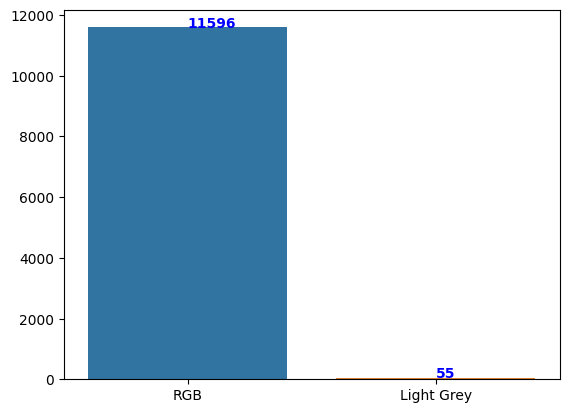

In [ ]:
sns.barplot(x=list(Count.keys()), 
            y=list(Count.values()))
for i, v in enumerate(Count.values()):
    plt.text(i, v + 3, str(v), color='blue', fontweight='bold')
plt.show()

Tương tự với tập dữ liệu Small Dataset, số lượng ảnh trong tập dữ liệu Big Dataset phần lớn là ảnh sử dụng hệ màu RGB

Nhận xét: <br>Các dữ liệu ảnh có kích thước không đồng nhất, màu sắc và hình ảnh ngoại cảnh cũng khác nhau<br>Cần một bước xử lý để thay đổi kích thước ảnh về tiêu chuẩn, và loại bỏ các phần ảnh thừa (ngoại cảnh) để làm giảm nhiễu.<br> Cả hai tập dữ liệu ảnh đều có sự tương đồng về sự phân bố các đặc trưng, các thông số kích thước của ảnh

# Cắt ảnh

#### Tải thư viện FaceBoxes

In [ ]:
!pip install gdown
!pip install --upgrade gdown
!gdown --id 1S3YS0ZKD9coJqsD-p2hZNsH7XApQuj94

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1S3YS0ZKD9coJqsD-p2hZNsH7XApQuj94
To: /content/FaceBoxes.zip
100% 3.79M/3.79M [00:00<00:00, 217MB/s]


In [ ]:
%cd /content
!unzip FaceBoxes.zip

/content
Archive:  FaceBoxes.zip
   creating: FaceBoxes/
  inflating: FaceBoxes/.gitignore    
  inflating: FaceBoxes/FaceBoxes.py  
  inflating: FaceBoxes/FaceBoxes_ONNX.py  
  inflating: FaceBoxes/__init__.py   
  inflating: FaceBoxes/build_cpu_nms.sh  
  inflating: FaceBoxes/onnx.py       
  inflating: FaceBoxes/readme.md     
   creating: FaceBoxes/models/
  inflating: FaceBoxes/models/__init__.py  
  inflating: FaceBoxes/models/faceboxes.py  
   creating: FaceBoxes/utils/
  inflating: FaceBoxes/utils/.gitignore  
  inflating: FaceBoxes/utils/__init__.py  
  inflating: FaceBoxes/utils/box_utils.py  
  inflating: FaceBoxes/utils/build.py  
  inflating: FaceBoxes/utils/config.py  
  inflating: FaceBoxes/utils/functions.py  
  inflating: FaceBoxes/utils/nms_wrapper.py  
  inflating: FaceBoxes/utils/prior_box.py  
  inflating: FaceBoxes/utils/timer.py  
   creating: FaceBoxes/utils/nms/
  inflating: FaceBoxes/utils/nms/.gitignore  
  inflating: FaceBoxes/utils/nms/__init__.py  
  infla

In [ ]:
%cd FaceBoxes
!sh ./build_cpu_nms.sh

/content/FaceBoxes
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/FaceBoxes/utils/nms/cpu_nms.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
nms/cpu_nms.c: In function ‘__pyx_pf_3nms_7cpu_nms_2cpu_soft_nms’:
nms/cpu_nms.c:3550:33: warning: comparison of integer expressions of different signedness: ‘int’ and ‘unsigned int’ [-Wsign-compare]
 3550 |       __pyx_t_8 = ((__pyx_v_pos < __pyx_v_N) != 0);
      |                                 ^
nms/cpu_nms.c:4061:33: warning: comparison of integer expressions of different signedness: ‘int’ and ‘unsigned int’ [-Wsign-compare]
 4061 |       __pyx_t_8 = ((__pyx_v_pos < __pyx_v_N) != 0);
      |                                 ^


In [ ]:
%cd /content

/content


#### Sử dụng thư viện FaceBoxes để cắt lọc gương mặt

In [ ]:
from FaceBoxes import FaceBoxes
face_boxes = FaceBoxes()

In [ ]:
# Cắt phần khuôn mặt và lưu vào trong thư mục Crop
for name in names:
  path_folder = os.path.join('/content/drive/MyDrive/KHDL/Crop',name)
  if not os.path.exists(path_folder):
    os.makedirs(path_folder)
for i, image in enumerate(Images):
    boxes = face_boxes(image)  # x1 y1 x2 y2
    if len(boxes) == 1:
        x1, y1, x2, y2, _ = boxes[0]
        x1 = int(x1)
        x2 = int(x2)
        y1 = int(y1)
        y2 = int(y2)
        face_img = image[y1:y2, x1:x2, :]
        if 100 < face_img.shape[0] < 500 and 100 < face_img.shape[1] < 500:
            cv2.imwrite(os.path.join('/content/drive/MyDrive/KHDL/Crop',names[Labels[i]], f'{i}.jpg'), face_img)

In [ ]:
Images, Labels = Get_data("Crop")

<ipython-input-17-899cf226c2dd>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images), np.array(labels)


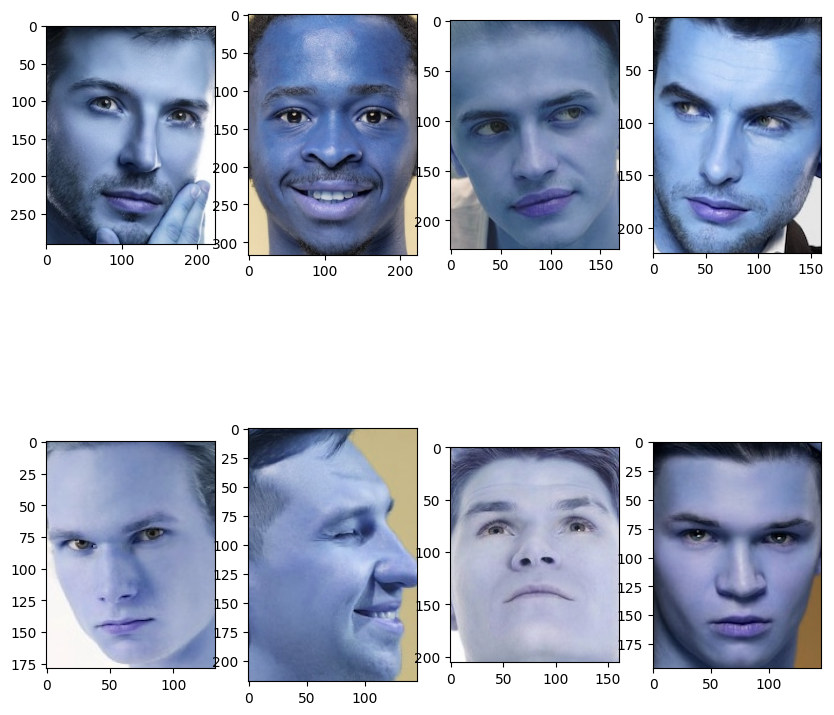

In [ ]:
# Hiện thị một số kết quả
fig, axss = plt.subplots(2,4, figsize=(10,10))
for idx, axs in enumerate(axss):
    for idy, ax in enumerate(axs):
      ax.imshow(Images[idx*4 + idy])
plt.show()

In [ ]:
w = []
h = []
mode = []
for image in Images:
  shape = image.shape
  w.append(shape[1])
  h.append(shape[0])
numberEachClass = np.unique(Labels, return_counts=True)

In [ ]:
numberEachClass

(array([0, 1]), array([4881, 5575]))

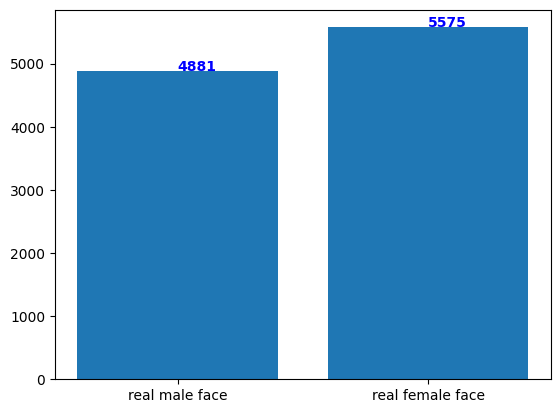

In [ ]:
plt.bar(names, numberEachClass[1])
for i, v in enumerate(numberEachClass[1]):
    plt.text(i, v + 3, str(v), color='blue', fontweight='bold')
plt.show()

Nhận xét:
<br>- Có thể thấy, số lượng ảnh đã giảm đáng kể, 10% lượng ảnh ban đầu khi áp dụng với Big Dataset.<br>- Tuy nhiên, mức chênh lệch giữa các lớp dữ liệu không lớn

Chiều rộng: 101 - 483
Chiều dài: 107 - 497
Tỷ lệ: 0.36682242990654207 - 1.6932515337423313
Kích cỡ ảnh: 11322 - 204792


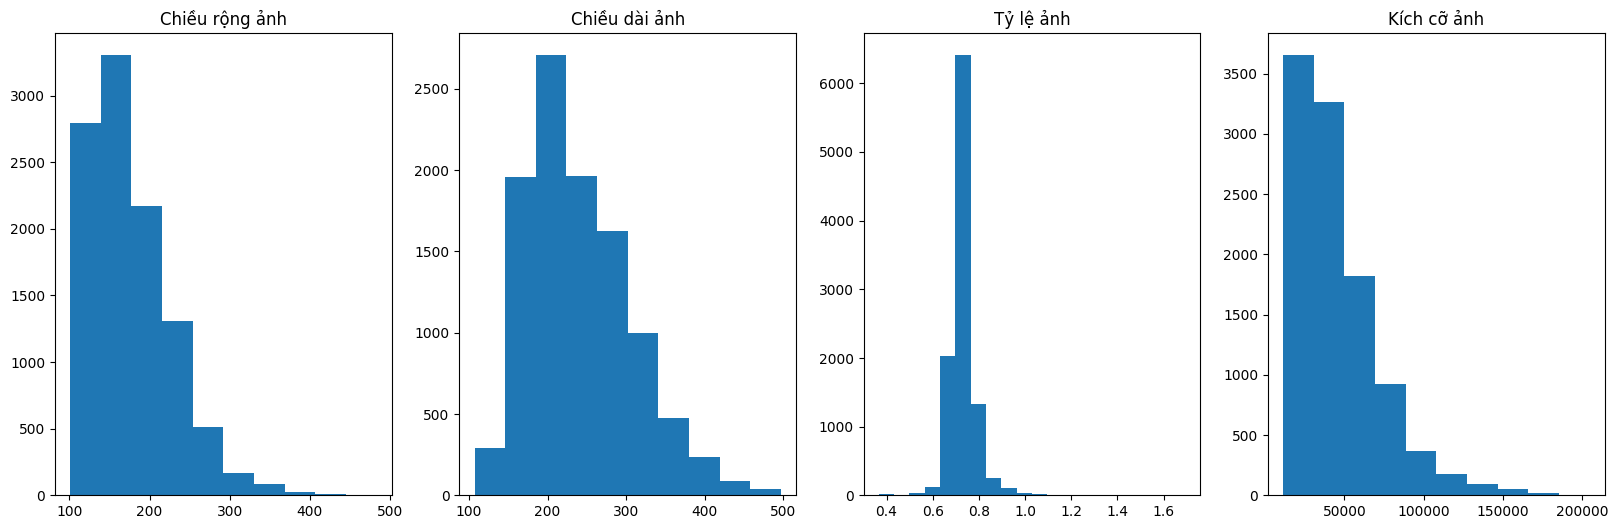

In [ ]:
plt.figure(figsize=(20, 6))
print(f"Chiều rộng: {min(w)} - {max(w)}")
plt.subplot(1,4,1)
plt.title("Chiều rộng ảnh")
plt.hist(w)
print(f"Chiều dài: {min(h)} - {max(h)}")
plt.subplot(1,4,2)
plt.title("Chiều dài ảnh")
plt.hist(h)
print(f"Tỷ lệ: {min(np.divide(w,h))} - {max(np.divide(w,h))}")
plt.subplot(1,4,3)
plt.title("Tỷ lệ ảnh")
plt.hist(np.divide(w,h), bins=20)
print(f"Kích cỡ ảnh: {min(np.multiply(w,h))} - {max(np.multiply(w,h))}")
plt.subplot(1,4,4)
plt.title("Kích cỡ ảnh")
plt.hist(np.multiply(w,h), bins=10)

plt.show() 

Nhận xét: 
<br>- Chiều rộng (tính theo pixel) của ảnh có giá trị thuộc khoảng (101, 483), tập trung chủ yếu ở giá trị khoảng (100,200) pixel
<br>- Chiều dài (tính theo pixel) của ảnh có giá trị thuộc khoảng (107, 497), tập trung chủ yếu ở giá trị khoảng (140,220) pixel
<br>- Tỷ lệ (chiều rộng /  chiều dài) của ảnh có giá trị thuộc khoảng (0.6, 2.7), tập trung chủ yếu ở khoảng giá trị 0.7
<br>- Kích thước (tính theo pixel) của ảnh có giá trị thuộc khoảng (142728 , 391876), tập trung chủ yếu ở khoảng dưới 50000 pixel

Sau khi tiền xử lý:
<br>- Các thông số và kích cỡ đã giảm đi đáng kể, làm giảm nhiễu cho quá trình trích xuất đặc trưng và huấn luyện mô hình. Góp phần làm tăng độ chính xác của mô hình.
<br>- Quá trình tiền xử lý làm thay đổi số lượng mẫu dữ liệu ảnh trong tập dữ liệu nhưng vẫn giữa được sự phân bố đồng đều giữa các lớp.